In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=120)

In [2]:
survey_1 = 'SDSS'
survey_2 = 'LSST_DESI'

This notebook makes a 2D plot of the ratio of statistical-only signal to noise from the Blazek et al case and from the shape-measurement case as a function of a and the percentage covaraince between methods.

In [3]:
# Load StoN from Blazek method for each survey under consideration (only one value). We actually saved the square of what we want.
StoNsq_Blazek_1 = np.loadtxt('../txtfiles/StoNstat_Blazek_survey='+survey_1+'.txt')
StoNsq_Blazek_2 = np.loadtxt('../txtfiles/StoNstat_Blazek_survey='+survey_2+'.txt')
StoN_Blazek_1 = np.sqrt(StoNsq_Blazek_1)
StoN_Blazek_2 = np.sqrt(StoNsq_Blazek_2)
print "StoN Blazek, SDSS=", StoN_Blazek_1, "and LSST+DESI=", StoN_Blazek_2

StoN Blazek, SDSS= 0.522163041544 and LSST+DESI= 20.7809704381


In [4]:
# Load vectors of a and the percentage covariance between methods for the shape measurement case
a_1 = np.loadtxt('../txtfiles/a_StoNstat_survey='+survey_1+'.txt')
covperc_1 = np.loadtxt('../txtfiles/cov_perc_StoNstat_survey='+survey_1+'.txt')
a_2 = np.loadtxt('../txtfiles/a_StoNstat_survey='+survey_2+'.txt')
covperc_2 = np.loadtxt('../txtfiles/cov_perc_StoNstat_survey='+survey_2+'.txt')

# Load the matrix of StoN values from the shape-measurement method at each pair of a / % covariance values
StoNsq_shapes_1 = np.loadtxt('../txtfiles/StoNsq_shapes_survey='+survey_1+'.txt')
StoN_shapes_1 = np.sqrt(StoNsq_shapes_1)
StoNsq_shapes_2 = np.loadtxt('../txtfiles/StoNsq_shapes_survey='+survey_2+'.txt')
StoN_shapes_2 = np.sqrt(StoNsq_shapes_2)

difference= [[ 4.56270651  4.56271232  4.56271979  4.56272974  4.56274368  4.56276458  4.56279942  4.5628691   4.56307811]
 [ 4.56269676  4.56270135  4.56270725  4.56271512  4.56272613  4.56274264  4.56277017  4.56282523  4.56299038]
 [ 4.56268816  4.56269167  4.56269619  4.56270221  4.56271064  4.56272329  4.56274436  4.56278652  4.56291297]
 [ 4.5626807   4.56268329  4.5626866   4.56269103  4.56269722  4.56270651  4.562722    4.56275297  4.56284587]
 [ 4.5626744   4.56267619  4.56267849  4.56268156  4.56268587  4.56269232  4.56270307  4.56272458  4.5627891 ]
 [ 4.56266923  4.56267038  4.56267186  4.56267382  4.56267657  4.5626807   4.56268759  4.56270135  4.56274264]
 [ 4.56266522  4.56266586  4.56266669  4.5626678   4.56266935  4.56267167  4.56267554  4.56268329  4.56270651]
 [ 4.56266235  4.56266264  4.56266301  4.5626635   4.56266419  4.56266522  4.56266694  4.56267038  4.5626807 ]
 [ 4.56266063  4.5626607   4.56266079  4.56266092  4.56266109  4.56266135  4.56266178  4.56266264  4

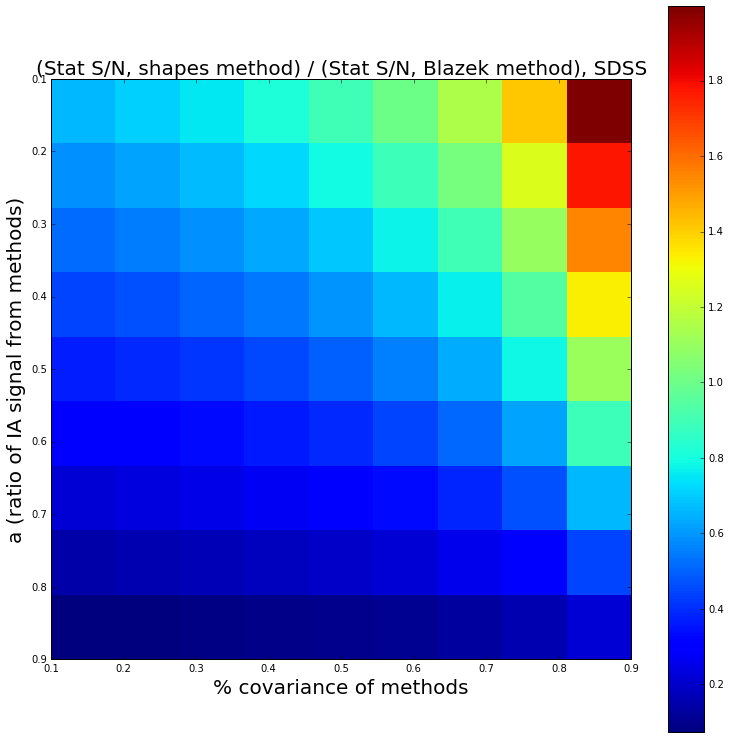

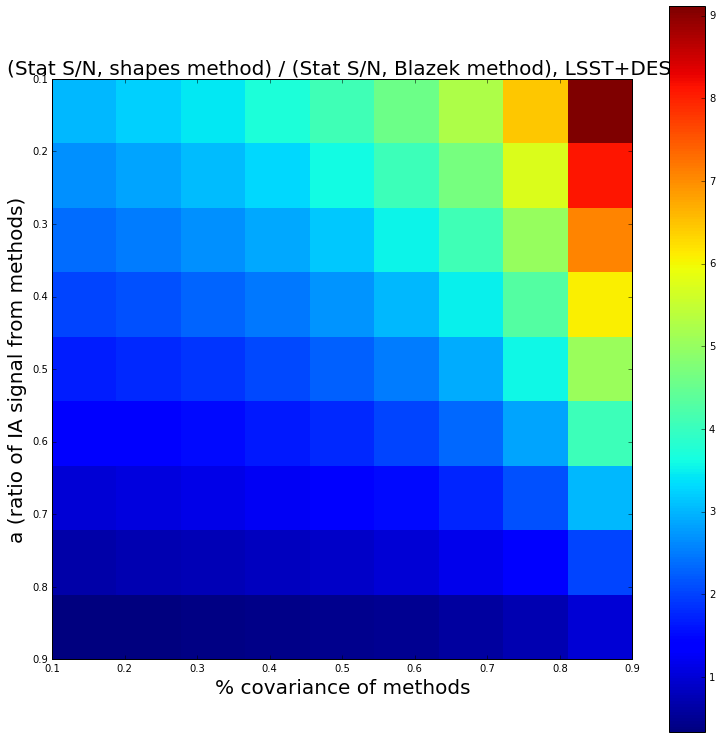

In [5]:
# Make a 2D colour plot of the ratio of the S to N values for each survey
# If the value plotted is greater than 1, the shape measurment does better for that combination of a and % cov.

StoNratio_1 = StoN_shapes_1 / StoN_Blazek_1

#for i in range(0,len(a)):
#    for j in range(0,len(covperc)):
#        if StoNratio[i,j]< 1.0:
#            StoNratio[i,j] =0

plt.figure(figsize=(13, 13))
plt.imshow(StoNratio_1, extent=[covperc_1[0], covperc_1[-1], a_1[-1], a_1[0]], aspect=1, interpolation='None')
plt.colorbar()
plt.xlabel('% covariance of methods', fontsize=20)
plt.ylabel('a (ratio of IA signal from methods)', fontsize=20)
plt.title('(Stat S/N, shapes method) / (Stat S/N, Blazek method), SDSS', fontsize=20)
#plt.show()
plt.savefig('../plots/StoN_2d_stat_'+survey_1+'.pdf')

StoNratio_2 = StoN_shapes_2 / StoN_Blazek_2

plt.figure(figsize=(13, 13))
plt.imshow(StoNratio_2, extent=[covperc_2[0], covperc_2[-1], a_2[-1], a_2[0]], aspect=1, interpolation='None')
plt.colorbar()
plt.xlabel('% covariance of methods', fontsize=20)
plt.ylabel('a (ratio of IA signal from methods)', fontsize=20)
plt.title('(Stat S/N, shapes method) / (Stat S/N, Blazek method), LSST+DESI', fontsize=20)
#plt.show()
plt.savefig('../plots/StoN_2d_stat_'+survey_2+'.pdf')

# These ratios should be off by a value independent of a / covperc. What is it?
print "difference=", StoNratio_2 / StoNratio_1